# Reading in Data

In [27]:
"""Reading in the Dynamic Spectrum"""
import numpy as np
import astropy.units as u 
'''Load the dynamic spectra'''
dir = '/mnt/scratch-lustre/simard/b0834/data/'
nt = 660
nf = 16384*4
I = np.zeros([2, nf, nt], dtype=complex)
for i in range(4):
    for g in ['0', '1', '6']:
        I[0,i*nf//4:(i+1)*nf//4, :] += np.fromfile(dir+'/Ar-Ar/freq0'+str(i)+'/gate'+g+'.bin',
                                                  np.float32).reshape(-1,nf//4).T
        I[1, i*nf//4:(i+1)*nf//4, :] += np.fromfile(dir+'/Gb-Gb/freq0'+str(i)+'/gate'+g+'.bin',
                                                   np.float32).reshape(-1,nf//4).T
f = (np.arange(nf)*8.*4./nf+310.5)*u.MHz # Frequencies in Megahurtz-> For secondary spectrum
t = (np.arange(nt)*6729./nt)*u.s # Time in Secondss

# I[0] is data for the Aricebo Dynamic Spectrum
# I[1] is data for the 

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Arecibo Dynamic Spectrum

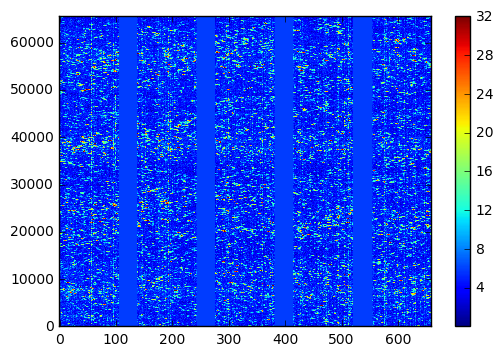

In [31]:
plt.imshow(np.abs(I[0]), interpolation = 'none', origin = 'lower', aspect = 'auto', vmax = 32)
plt.colorbar()

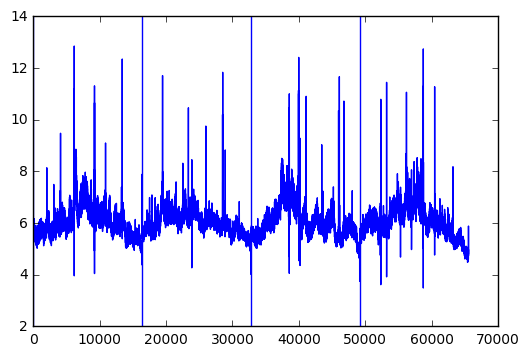

In [32]:
plt.plot(np.abs(I[0,...]).mean(axis=1))
for i in range(4):
    plt.axvline(i*nf//4)

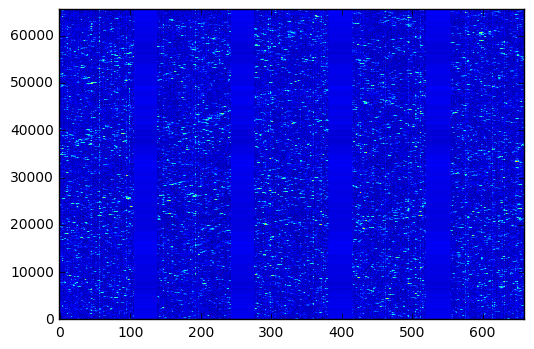

In [33]:
plt.imshow(np.abs(I[0])/np.abs(I[0]).mean(axis=1,keepdims=True), interpolation = 'none', origin = 'lower', aspect = 'auto')